# Hyperparameter Tuning in Python


## 1. Hyperparameters and Parameters


Answer: coef_

In [33]:
import pandas as pd
import numpy as np

df = pd.read_csv('credit-card-full.csv')
df_encoded = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'], prefix=['SEX', 'EDUCATION', 'MARRIAGE'])

X = df_encoded.drop(['EDUCATION_0', 'ID', 'MARRIAGE_0', 'SEX_1', 'default payment next month'], axis=1)
y = df_encoded['default payment next month']

random_seed = 42
sample_size = 1600
sampled_indices = df_encoded.sample(n=sample_size, random_state=random_seed).index

X_train = X.loc[sampled_indices]
y_train = y.loc[sampled_indices]

In [35]:
import warnings
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore")

logreg_params = {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 
                 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 
                 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

log_reg_clf = LogisticRegression(**logreg_params)
log_reg_clf.fit(X_train, y_train)

LogisticRegression()

In [38]:
# Create a list of original variable names from the training DataFrame
original_variables = X_train.columns

# Extract the coefficients of the logistic regression estimator
model_coefficients = log_reg_clf.coef_[0]

# Create a dataframe of the variables and coefficients & print it out
coefficient_df = pd.DataFrame({"Variable" : original_variables, "Coefficient": model_coefficients})
print(coefficient_df)

       Variable   Coefficient
0     LIMIT_BAL -3.434585e-06
1           AGE -4.708308e-06
2         PAY_0  3.112030e-07
3         PAY_2  2.012498e-07
4         PAY_3  1.855993e-07
5         PAY_4  1.771854e-07
6         PAY_5  1.777204e-07
7         PAY_6  1.734323e-07
8     BILL_AMT1 -2.084619e-05
9     BILL_AMT2  2.244620e-05
10    BILL_AMT3 -7.660850e-06
11    BILL_AMT4  1.212736e-05
12    BILL_AMT5 -1.887515e-05
13    BILL_AMT6  2.303987e-05
14     PAY_AMT1 -1.034822e-04
15     PAY_AMT2 -3.787531e-05
16     PAY_AMT3 -5.279833e-05
17     PAY_AMT4 -3.180241e-05
18     PAY_AMT5 -4.678413e-05
19     PAY_AMT6 -6.334266e-06
20        SEX_2 -1.157515e-07
21  EDUCATION_1 -2.700824e-08
22  EDUCATION_2 -9.808612e-08
23  EDUCATION_3 -1.568191e-08
24  EDUCATION_4 -2.121665e-09
25  EDUCATION_5 -3.886356e-09
26  EDUCATION_6 -7.516344e-10
27   MARRIAGE_1 -2.987857e-08
28   MARRIAGE_2 -1.182870e-07
29   MARRIAGE_3  2.902203e-09


In [39]:
# Print out the top 3 positive variables
top_three_df = coefficient_df.sort_values(by='Coefficient', axis=0, ascending=False)[0:3]
print(top_three_df)

     Variable  Coefficient
13  BILL_AMT6     0.000023
9   BILL_AMT2     0.000022
11  BILL_AMT4     0.000012


In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 
             'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 
             'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 
             'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

rf_clf = RandomForestClassifier(**rf_params)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, max_features='auto')

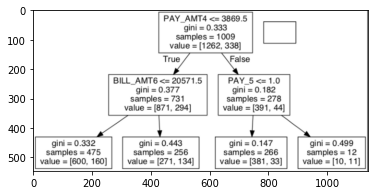

This node split on feature PAY_0, at a value of 1.5


In [45]:
import matplotlib.pyplot as plt

tree_viz_image = plt.imread('tree_viz_image.png')

# Extract the 7th (index 6) tree from the random forest
chosen_tree = rf_clf.estimators_[6]

# Visualize the graph using the provided image
imgplot = plt.imshow(tree_viz_image)
plt.show()

# Extract the parameters and level of the top (index 0) node
split_column = chosen_tree.tree_.feature[0]
split_column_name = X_train.columns[split_column]
split_value = chosen_tree.tree_.threshold[0]

# Print out the feature and level
print("This node split on feature {}, at a value of {}".format(split_column_name, split_value))

Answer: oob_score

In [46]:
import pandas as pd
import numpy as np

df = pd.read_csv('credit-card-full.csv')
df_encoded = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'], prefix=['SEX', 'EDUCATION', 'MARRIAGE'])
df_final = df_encoded.drop(['EDUCATION_0', 'ID', 'MARRIAGE_0', 'SEX_1'], axis=1)

df_sample = df_final.sample(2000)
df_sample

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
7907,50000,29,0,0,2,2,2,0,24043,26806,...,0,0,1,0,0,0,0,0,1,0
5190,100000,30,1,-2,-2,-1,2,0,0,0,...,1,0,1,0,0,0,0,0,1,0
23872,230000,30,-1,0,-1,0,0,0,9125,7795,...,0,0,1,0,0,0,0,0,1,0
16770,40000,38,3,2,0,0,2,0,38291,37380,...,0,0,1,0,0,0,0,1,0,0
19295,360000,41,-1,-1,-1,-1,-1,-1,3640,1436,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,200000,34,1,2,2,3,2,2,138839,142121,...,0,0,0,1,0,0,0,0,1,0
5105,80000,45,0,0,0,0,0,0,28219,29276,...,0,0,1,0,0,0,0,0,0,1
26758,50000,27,0,0,0,0,0,0,19657,20723,...,0,0,1,0,0,0,0,0,1,0
11093,210000,40,0,0,0,0,0,0,60183,63035,...,0,1,0,0,0,0,0,1,0,0


In [48]:
from sklearn.model_selection import train_test_split

X = df_sample.drop(['default payment next month'], axis=1)
y = df_sample['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [49]:
rf_clf_old = RandomForestClassifier(n_estimators=5, random_state=42)
rf_clf_old.fit(X_train, y_train)
rf_old_predictions = rf_clf_old.predict(X_test)

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Print out the old estimator, notice which hyperparameter is badly set
print(rf_clf_old)

# Get confusion matrix & accuracy for the old rf_model
print("Confusion Matrix: \n\n {} \n Accuracy Score: \n\n {}".format(
  confusion_matrix(y_test, rf_old_predictions),
  accuracy_score(y_test, rf_old_predictions))) 

# Create a new random forest classifier with better hyperparamaters
rf_clf_new = RandomForestClassifier(n_estimators=500)

# Fit this to the data and obtain predictions
rf_new_predictions = rf_clf_new.fit(X_train, y_train).predict(X_test)

# Assess the new model (using new predictions!)
print("Confusion Matrix: \n\n", confusion_matrix(y_test, rf_new_predictions))
print("Accuracy Score: \n\n", accuracy_score(y_test, rf_new_predictions))

RandomForestClassifier(n_estimators=5, random_state=42)
Confusion Matrix: 

 [[274  33]
 [ 68  25]] 
 Accuracy Score: 

 0.7475
Confusion Matrix: 

 [[288  19]
 [ 67  26]]
Accuracy Score: 

 0.785


In [54]:
from sklearn.neighbors import KNeighborsClassifier

# Build a knn estimator for each value of n_neighbours
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_20 = KNeighborsClassifier(n_neighbors=20)

# Fit each to the training data & produce predictions
knn_5_predictions = knn_5.fit(X_train, y_train).predict(X_test)
knn_10_predictions = knn_10.fit(X_train, y_train).predict(X_test)
knn_20_predictions = knn_20.fit(X_train, y_train).predict(X_test)

# Get an accuracy score for each of the models
knn_5_accuracy = accuracy_score(y_test, knn_5_predictions)
knn_10_accuracy = accuracy_score(y_test, knn_10_predictions)
knn_20_accuracy = accuracy_score(y_test, knn_20_predictions)
print("The accuracy of 5, 10, 20 neighbours was {}, {}, {}".format(knn_5_accuracy, knn_10_accuracy, knn_20_accuracy))

The accuracy of 5, 10, 20 neighbours was 0.73, 0.7575, 0.77


In [56]:
from sklearn.ensemble import GradientBoostingClassifier

# Set the learning rates & results storage
learning_rates = [ 0.001, 0.01, 0.05, 0.1, 0.2, 0.5]
results_list = []

# Create the for loop to evaluate model predictions for each learning rate
for learning_rate in learning_rates:
    model = GradientBoostingClassifier(learning_rate=learning_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    # Save the learning rate and accuracy score
    results_list.append([learning_rate, accuracy_score(y_test, predictions)])

# Gather everything into a DataFrame
results_df = pd.DataFrame(results_list, columns=['learning_rate', 'accuracy'])
print(results_df)

   learning_rate  accuracy
0          0.001    0.7675
1          0.010    0.7875
2          0.050    0.7950
3          0.100    0.7800
4          0.200    0.7750
5          0.500    0.7575


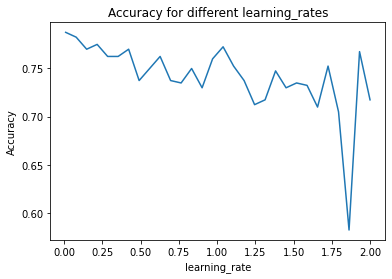

In [57]:
# Set the learning rates & accuracies list
learn_rates = np.linspace(0.01, 2, num=30)
accuracies = []

# Create the for loop
for learn_rate in learn_rates:
    # Create the model, predictions & save the accuracies as before
    model = GradientBoostingClassifier(learning_rate=learn_rate)
    predictions = model.fit(X_train, y_train).predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

# Plot results    
plt.plot(learn_rates, accuracies)
plt.gca().set(xlabel='learning_rate', ylabel='Accuracy', title='Accuracy for different learning_rates')
plt.show()

## 2. Grid Search

In [58]:
df_sample = df_final.sample(500)

X = df_sample.drop(['default payment next month'], axis=1)
y = df_sample['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [59]:
# Create the function
def gbm_grid_search(learning_rate, max_depth):

    # Create the model
    model = GradientBoostingClassifier(learning_rate=learning_rate, max_depth=max_depth)
    
    # Use the model to make predictions
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Return the hyperparameters and score
    return([learning_rate, max_depth, accuracy_score(y_test, predictions)])

In [60]:
# Create the relevant lists
results_list = []
learn_rate_list = (0.01, 0.1, 0.5)
max_depth_list = (2, 4, 6)

# Create the for loop
for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
        results_list.append(gbm_grid_search(learn_rate,max_depth))

# Print the results
print(results_list)   

[[0.01, 2, 0.78], [0.01, 4, 0.77], [0.01, 6, 0.77], [0.1, 2, 0.76], [0.1, 4, 0.75], [0.1, 6, 0.72], [0.5, 2, 0.73], [0.5, 4, 0.69], [0.5, 6, 0.74]]


In [61]:
results_list = []
learn_rate_list = [0.01, 0.1, 0.5]
max_depth_list = [2,4,6]

# Extend the function input
def gbm_grid_search_extended(learn_rate, max_depth, subsample):

    # Extend the model creation section
    model = GradientBoostingClassifier(learning_rate=learn_rate, max_depth=max_depth, subsample=subsample)
    
    predictions = model.fit(X_train, y_train).predict(X_test)
    
    # Extend the return part
    return([learn_rate, max_depth, subsample, accuracy_score(y_test, predictions)])       

In [62]:
results_list = []

# Create the new list to test
subsample_list = [0.4 , 0.6]

for learn_rate in learn_rate_list:
    for max_depth in max_depth_list:
    
        # Extend the for loop
        for subsample in subsample_list:
            
            # Extend the results to include the new hyperparameter
            results_list.append(gbm_grid_search_extended(learn_rate, max_depth, subsample))
            
# Print results
print(results_list)

[[0.01, 2, 0.4, 0.76], [0.01, 2, 0.6, 0.76], [0.01, 4, 0.4, 0.75], [0.01, 4, 0.6, 0.76], [0.01, 6, 0.4, 0.76], [0.01, 6, 0.6, 0.75], [0.1, 2, 0.4, 0.78], [0.1, 2, 0.6, 0.76], [0.1, 4, 0.4, 0.77], [0.1, 4, 0.6, 0.79], [0.1, 6, 0.4, 0.77], [0.1, 6, 0.6, 0.8], [0.5, 2, 0.4, 0.7], [0.5, 2, 0.6, 0.71], [0.5, 4, 0.4, 0.64], [0.5, 4, 0.6, 0.74], [0.5, 6, 0.4, 0.62], [0.5, 6, 0.6, 0.73]]


Answer: 1215

    Model #1:
     GridSearchCV(
        estimator = RandomForestClassifier(),
        param_grid = {'max_depth': [2, 4, 8, 15], 'max_features': ['auto', 'sqrt']},
        scoring='roc_auc',
        n_jobs=4,
        cv=5,
        refit=True, return_train_score=True) 


    Model #2:
     GridSearchCV(
        estimator = KNeighborsClassifier(),
        param_grid = {'n_neighbors': [5, 10, 20], 'algorithm': ['ball_tree', 'brute']},
        scoring='accuracy',
        n_jobs=8,
        cv=10,
        refit=False) 


    Model #3:
     GridSearchCV(
        estimator = GradientBoostingClassifier(),
        param_grid = {'number_attempts': [2, 4, 6], 'max_depth': [3, 6, 9, 12]},
        scoring='accuracy',
        n_jobs=2,
        cv=7,
        refit=True) 

Answer: model_3  would not work when we try to fit it.

In [63]:
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Classifier with specified criterion
rf_class = RandomForestClassifier(criterion='entropy')

# Create the parameter grid
param_grid = {'max_depth' : (2, 4, 8, 15), 'max_features' : ('auto', 'sqrt')} 

# Create a GridSearchCV object
grid_rf_class = GridSearchCV(
    estimator=rf_class,
    param_grid=param_grid,
    scoring='roc_auc',
    n_jobs=4,
    cv=5,
    refit=True, return_train_score=True)
print(grid_rf_class)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'max_depth': (2, 4, 8, 15),
                         'max_features': ('auto', 'sqrt')},
             return_train_score=True, scoring='roc_auc')


Answer: refit = True

In [78]:
rf_class = RandomForestClassifier(criterion='entropy')
param_grid = {'max_depth' : (2, 4, 8, 15), 'max_features' : ('auto', 'sqrt'), 'n_estimators' : (100, 200, 300)} 
grid_rf_class = GridSearchCV(estimator=rf_class, param_grid=param_grid, scoring='roc_auc', 
                             n_jobs=4, cv=5, refit=True, return_train_score=True)

In [79]:
grid_rf_class.fit(X_train, y_train)

# Read the cv_results property into a dataframe & print it out
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
print(cv_results_df)

# Extract and print the column with a dictionary of hyperparameters used
column = cv_results_df.loc[:, ["params"]]
print(column)

# Extract and print the row that had the best mean test score
best_row = cv_results_df[cv_results_df["rank_test_score"] == 1]
print(best_row)

    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.353467      0.022441         0.022152        0.007055   
1        0.654546      0.011328         0.044493        0.003847   
2        1.037812      0.080116         0.062904        0.016746   
3        0.356382      0.034225         0.022947        0.005485   
4        0.647901      0.037363         0.051246        0.009350   
5        0.981798      0.025119         0.064743        0.015080   
6        0.393545      0.016206         0.031023        0.009257   
7        0.754373      0.035098         0.045859        0.007437   
8        1.103846      0.052606         0.067337        0.022416   
9        0.378542      0.054999         0.029330        0.010238   
10       0.764557      0.070293         0.044324        0.007789   
11       1.056849      0.006882         0.056768        0.009222   
12       0.418371      0.012731         0.023794        0.004277   
13       0.770378      0.009765         0.039221

In [80]:
# Print out the ROC_AUC score from the best-performing square
best_score = grid_rf_class.best_score_
print(best_score)

# Create a variable from the row related to the best-performing square
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
best_row = cv_results_df.loc[[grid_rf_class.best_index_]]
print(best_row)

# Get the n_estimators parameter from the best-performing square and print
best_n_estimators = grid_rf_class.best_params_["n_estimators"]
print(best_n_estimators)

0.7984469370146678
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
7       0.754373      0.035098         0.045859        0.007437   

  param_max_depth param_max_features param_n_estimators  \
7               4               auto                200   

                                              params  split0_test_score  \
7  {'max_depth': 4, 'max_features': 'auto', 'n_es...           0.704918   

   split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
7           0.853322  ...         0.798447        0.050466                1   

   split0_train_score  split1_train_score  split2_train_score  \
7            0.953138            0.919219            0.928387   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
7            0.933024            0.926445          0.932043         0.011447  

[1 rows x 23 columns]
200


In [82]:
from sklearn.metrics import roc_auc_score

# See what type of object the best_estimator_ property is
print(type(grid_rf_class.best_estimator_))

# Create an array of predictions directly using the best_estimator_ property
predictions = grid_rf_class.best_estimator_.predict(X_test)

# Take a look to confirm it worked, this should be an array of 1's and 0's
print(predictions[0:5])

# Now create a confusion matrix 
print("Confusion Matrix \n", confusion_matrix(y_test, predictions))

# Get the ROC-AUC score
predictions_proba = grid_rf_class.best_estimator_.predict_proba(X_test)[:,1]
print("ROC-AUC Score \n", roc_auc_score(y_test, predictions_proba))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
[0 0 1 0 0]
Confusion Matrix 
 [[73  4]
 [20  3]]
ROC-AUC Score 
 0.6307171089779786


## 3. Random Search


In [134]:
from itertools import product

# Create a list of values for the learning_rate hyperparameter
learn_rate_list = list(np.linspace(0.01,1.5,200))

# Create a list of values for the min_samples_leaf hyperparameter
min_samples_list = list(range(10,41))

# Combination list
combinations_list = [list(x) for x in product(learn_rate_list, min_samples_list)]

# Sample hyperparameter combinations for a random search.
random_combinations_index = np.random.choice(range(0, len(combinations_list)), 250, replace=False)
combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]

# Print the result
print(combinations_random_chosen)

[[1.0657286432160804, 18], [0.5640703517587939, 20], [1.0357788944723618, 17], [0.691356783919598, 29], [0.15226130653266332, 20], [0.8635678391959799, 32], [0.5416080402010051, 31], [0.2720603015075377, 19], [0.8036683417085427, 13], [1.4925125628140703, 13], [0.039949748743718594, 22], [0.18969849246231157, 16], [1.1705527638190953, 39], [0.8710552763819095, 26], [0.5341206030150754, 38], [1.372713567839196, 13], [0.21964824120603016, 11], [0.024974874371859294, 29], [0.5191457286432161, 15], [1.178040201005025, 33], [0.4592462311557789, 34], [1.2828643216080402, 28], [0.287035175879397, 23], [0.9010050251256281, 11], [0.43678391959798996, 16], [0.2421105527638191, 23], [1.0657286432160804, 31], [1.3427638190954774, 17], [0.2945226130653266, 35], [0.08487437185929647, 24], [0.7063316582914573, 25], [1.1031658291457287, 27], [0.8560804020100502, 28], [0.36190954773869344, 27], [0.8111557788944723, 22], [0.23462311557788945, 31], [0.9234673366834171, 11], [0.15974874371859296, 29], [1.

In [142]:
import random

# Create lists for criterion and max_features
criterion_list = ['gini', 'entropy']
max_feature_list = ["auto", "sqrt", "log2", None]

# Create a list of values for the max_depth hyperparameter
max_depth_list = list(range(3,56))

# Combination list
combinations_list = [list(x) for x in product(criterion_list, max_feature_list, max_depth_list)]

# Sample hyperparameter combinations for a random search
combinations_random_chosen = random.sample(combinations_list, 150)

# Print the result
print(combinations_random_chosen)

[['gini', 'log2', 35], ['gini', None, 6], ['gini', None, 37], ['entropy', 'log2', 42], ['entropy', None, 50], ['entropy', 'auto', 14], ['entropy', None, 31], ['gini', 'log2', 10], ['gini', 'auto', 32], ['entropy', None, 36], ['entropy', 'auto', 18], ['gini', None, 52], ['gini', 'log2', 13], ['gini', 'log2', 27], ['gini', 'sqrt', 49], ['entropy', 'auto', 29], ['entropy', None, 52], ['entropy', None, 20], ['entropy', 'auto', 16], ['entropy', 'sqrt', 44], ['entropy', 'auto', 46], ['gini', 'log2', 16], ['entropy', 'auto', 38], ['entropy', 'sqrt', 49], ['entropy', 'log2', 40], ['entropy', None, 24], ['entropy', 'log2', 23], ['entropy', 'auto', 44], ['entropy', 'sqrt', 4], ['gini', 'auto', 17], ['gini', 'auto', 25], ['gini', 'log2', 29], ['gini', 'sqrt', 52], ['gini', None, 47], ['gini', 'sqrt', 55], ['entropy', None, 8], ['entropy', None, 30], ['entropy', None, 48], ['entropy', 'sqrt', 5], ['gini', 'sqrt', 54], ['entropy', 'log2', 38], ['entropy', None, 10], ['gini', 'auto', 38], ['entropy'

In [143]:
# print(inspect.getsource(sample_and_visualize_hyperparameters))
x_lims = [0.01, 1.5]
y_lims = [10, 29]

def sample_and_visualize_hyperparameters(n_samples):

    # If asking for all combinations, just return the entire list.
    if n_samples == len(combinations_list):
        combinations_random_chosen = combinations_list
    else:
        combinations_random_chosen = []
        random_combinations_index = np.random.choice(range(0, len(combinations_list)), n_samples, replace=False)
        combinations_random_chosen = [combinations_list[x] for x in random_combinations_index]
    
    # Pull out the X and Y to plot
    rand_y, rand_x = [x[0] for x in combinations_random_chosen], [x[1] for x in combinations_random_chosen]

    # Plot 
    plt.clf() 
    plt.scatter(rand_y, rand_x, c=['blue']*len(combinations_random_chosen))
    plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Random Search Hyperparameters')
    plt.gca().set_xlim(x_lims)
    plt.gca().set_ylim(y_lims)
    plt.show()

In [ ]:
# Confirm how many hyperparameter combinations & print
number_combs = len(combinations_list)
print(number_combs)

# Sample and visualise specified combinations
for x in [50, 500, 1500]:
    sample_and_visualize_hyperparameters(x)
    
# Sample all the hyperparameter combinations & visualise
sample_and_visualize_hyperparameters(number_combs)

Answer = n_iter

In [145]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
param_grid = {'learning_rate': np.linspace(0.1,2,150), 'min_samples_leaf': list(range(20,65))} 

# Create a random search object
random_GBM_class = RandomizedSearchCV(
    estimator = GradientBoostingClassifier(),
    param_distributions = param_grid,
    n_iter = 10,
    scoring='accuracy', n_jobs=4, cv=5, refit=True, return_train_score=True)

# Fit to the training data
random_GBM_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_GBM_class.cv_results_['param_learning_rate'])
print(random_GBM_class.cv_results_['param_min_samples_leaf'])

[1.948993288590604 1.2604026845637584 1.3114093959731543
 1.7449664429530203 1.8724832214765101 0.5845637583892618
 0.8268456375838926 0.8651006711409396 0.8140939597315436
 0.7630872483221476]
[45 41 31 41 56 44 27 37 22 53]


In [146]:
# Create the parameter grid
param_grid = {'max_depth': list(range(5,26)), 'max_features': ['auto' , 'sqrt']} 

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator=RandomForestClassifier(n_estimators=80),
    param_distributions=param_grid, n_iter=5,
    scoring='roc_auc', n_jobs=4, cv=3, refit=True, return_train_score=True)

# Fit to the training data
random_rf_class.fit(X_train, y_train)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])

[22 21 7 14 24]
['auto' 'auto' 'sqrt' 'auto' 'auto']


Answer: It is more computationally efficient than Grid Search.


In [148]:
# import inspect
# print(inspect.getsource(visualize_search))

def visualize_search(grid_combinations_chosen, random_combinations_chosen):
    grid_y, grid_x = [x[0] for x in grid_combinations_chosen], [x[1] for x in grid_combinations_chosen]
    rand_y, rand_x = [x[0] for x in random_combinations_chosen], [x[1] for x in random_combinations_chosen]

    # Plot all together
    plt.scatter(grid_y + rand_y, grid_x + rand_x, c=['red']*300 + ['blue']*300)
    plt.gca().set(xlabel='learn_rate', ylabel='min_samples_leaf', title='Grid and Random Search Hyperparameters')
    plt.gca().set_xlim(x_lims)
    plt.gca().set_ylim(y_lims)
    plt.show()

In [152]:
# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Print result
print(grid_combinations_chosen)

[['gini', 'auto', 3], ['gini', 'auto', 4], ['gini', 'auto', 5], ['gini', 'auto', 6], ['gini', 'auto', 7], ['gini', 'auto', 8], ['gini', 'auto', 9], ['gini', 'auto', 10], ['gini', 'auto', 11], ['gini', 'auto', 12], ['gini', 'auto', 13], ['gini', 'auto', 14], ['gini', 'auto', 15], ['gini', 'auto', 16], ['gini', 'auto', 17], ['gini', 'auto', 18], ['gini', 'auto', 19], ['gini', 'auto', 20], ['gini', 'auto', 21], ['gini', 'auto', 22], ['gini', 'auto', 23], ['gini', 'auto', 24], ['gini', 'auto', 25], ['gini', 'auto', 26], ['gini', 'auto', 27], ['gini', 'auto', 28], ['gini', 'auto', 29], ['gini', 'auto', 30], ['gini', 'auto', 31], ['gini', 'auto', 32], ['gini', 'auto', 33], ['gini', 'auto', 34], ['gini', 'auto', 35], ['gini', 'auto', 36], ['gini', 'auto', 37], ['gini', 'auto', 38], ['gini', 'auto', 39], ['gini', 'auto', 40], ['gini', 'auto', 41], ['gini', 'auto', 42], ['gini', 'auto', 43], ['gini', 'auto', 44], ['gini', 'auto', 45], ['gini', 'auto', 46], ['gini', 'auto', 47], ['gini', 'auto',

In [ ]:
x_lims = [0.01, 3.0]
y_lims = [5, 24]

# Sample grid coordinates
grid_combinations_chosen = combinations_list[0:300]

# Create a list of sample indexes
sample_indexes = list(range(0,len(combinations_list)))

# Randomly sample 300 indexes
random_indexes = np.random.choice(sample_indexes, 300, replace=False)

# Use indexes to create random sample
random_combinations_chosen = [combinations_list[index] for index in random_indexes]

# Call the function to produce the visualization
visualize_search(grid_combinations_chosen, random_combinations_chosen)

## 4. Informed Search


In [154]:
# import inspect
# print(inspect.getsource(visualize_hyperparameter))

def visualize_hyperparameter(name):
    plt.clf()
    plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
    plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
    plt.gca().set_ylim([0,100])
    plt.show()

In [ ]:
# Confirm the size of the combinations_list
print(len(combinations_list))

# Sort the results_df by accuracy and print the top 10 rows
print(results_df.sort_values(by='accuracy', ascending=False).head(10))

# Confirm which hyperparameters were used in this search
print(results_df.columns)

# Call visualize_hyperparameter() with each hyperparameter in turn
visualize_hyperparameter('max_depth')
visualize_hyperparameter('min_samples_leaf')
visualize_hyperparameter('learn_rate')

In [156]:
# import inspect
# print(inspect.getsource(visualize_first))

def visualize_first():
    for name in results_df.columns[0:2]:
        plt.clf()
        plt.scatter(results_df[name],results_df['accuracy'], c=['blue']*500)
        plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
        plt.gca().set_ylim([0,100])
        x_line = 20
        if name == "learn_rate":
            x_line = 1
        plt.axvline(x=x_line, color="red", linewidth=4)
        plt.show() 

In [ ]:
# Use the provided function to visualize the first results
visualize_first()

In [158]:
# Create some combinations lists & combine
max_depth_list = list(range(1, 21))
learn_rate_list = np.linspace(0.001, 1, 50)

In [159]:
# import inspect
# print(inspect.getsource(visualize_second))

def visualize_second():
    for name in results_df2.columns[0:2]:
        plt.clf()
        plt.scatter(results_df2[name],results_df2['accuracy'], c=['blue']*1000)
        plt.gca().set(xlabel='{}'.format(name), ylabel='accuracy', title='Accuracy for different {}s'.format(name))
        plt.gca().set_ylim([0,100])
        plt.show()

In [ ]:
# Call the function to visualize the second results
visualize_second()

In [160]:
# Assign probabilities to variables 
p_unhappy = 0.15
p_unhappy_close = 0.35

# Probabiliy someone will close
p_close = 0.07

# Probability unhappy person will close
p_close_unhappy = (p_unhappy_close * p_close) / p_unhappy
print(p_close_unhappy)

0.16333333333333336


In [ ]:
import hyperopt as hp

# Set up space dictionary with specified hyperparameters
space = {'max_depth': hp.quniform('max_depth', 2, 10, 2),
         'learning_rate': hp.uniform('learning_rate', 0.001, 0.9)}

# Set up objective function
def objective(params):
    params = {'max_depth': int(params['max_depth']),'learning_rate': params['learning_rate']}
    gbm_clf = GradientBoostingClassifier(n_estimators=100, **params) 
    best_score = cross_val_score(gbm_clf, X_train, y_train, scoring='accuracy', cv=2, n_jobs=4).mean()
    loss = 1 - best_score
    return loss

# Run the algorithm
best = fmin(fn=objective,space=space, max_evals=20, rstate=np.random.default_rng(42), algo=tpe.suggest)
print(best)

In [165]:
from tpot import TPOTClassifier


# Assign the values outlined to the inputs
number_generations = 3
population_size = 4
offspring_size = 3
scoring_function = 'accuracy'

# Create the tpot classifier
tpot_clf = TPOTClassifier(generations=number_generations, population_size=population_size,
                          offspring_size=offspring_size, scoring=scoring_function,
                          verbosity=2, random_state=2, cv=2)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

                                                                           
Generation 1 - Current best internal CV score: 0.8025
                                                                           
Generation 2 - Current best internal CV score: 0.8025
                                                                            
Generation 3 - Current best internal CV score: 0.8025
                                                                            
Best pipeline: DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=3, min_samples_leaf=10, min_samples_split=9)
0.75


In [166]:
# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=42)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

                                                                           
Generation 1 - Current best internal CV score: 0.8
                                                                            
Generation 2 - Current best internal CV score: 0.805
                                                                            
Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.6000000000000001, min_samples_leaf=3, min_samples_split=10, n_estimators=100)
0.76


In [167]:
# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=122)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

                                                                           
Generation 1 - Current best internal CV score: 0.7949999999999999
                                                                           
Generation 2 - Current best internal CV score: 0.7949999999999999
                                                                            
Best pipeline: BernoulliNB(input_matrix, alpha=0.01, fit_prior=True)
0.74


In [168]:
# Create the tpot classifier 
tpot_clf = TPOTClassifier(generations=2, population_size=4, offspring_size=3, scoring='accuracy', cv=2,
                          verbosity=2, random_state=99)

# Fit the classifier to the training data
tpot_clf.fit(X_train, y_train)

# Score on the test set
print(tpot_clf.score(X_test, y_test))

                                                                           
Generation 1 - Current best internal CV score: 0.8
                                                                            
Generation 2 - Current best internal CV score: 0.8025
                                                                            
Best pipeline: RandomForestClassifier(StandardScaler(input_matrix), bootstrap=False, criterion=entropy, max_features=0.35000000000000003, min_samples_leaf=14, min_samples_split=4, n_estimators=100)
0.76
